<a href="https://colab.research.google.com/github/kjji/dlaicourse/blob/master/Copy_of_1_Autoencoder_and_Denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder

### Importing Libraries

In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### Preparing Dataset

In [2]:
# Load MNIST Dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


### Autoencoder Model

In [3]:
# Hyper parameters
batch_size = 128
nb_epoch = 5

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 16

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               13328     
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


### Training

In [4]:
# Train
autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.3147 - val_loss: 0.2604
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2433 - val_loss: 0.2262
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2152 - val_loss: 0.2022
Epoch 4/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.1959 - val_loss: 0.1871
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.1834 - val_loss: 0.1769


### Evaluation

In [5]:
# Evaluate
evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

10000/10000 [==============================] - 0s 15us/step

Summary: Loss over the test dataset: 0.18


### Visualize the reconstruction

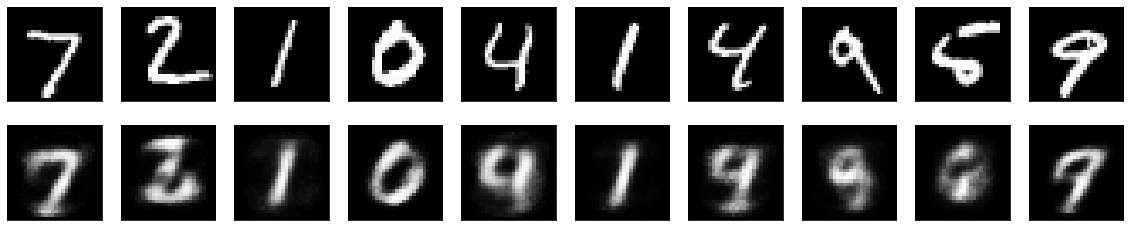

In [6]:
# Decode test images 
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Visualize the weights

Shape of Hidden Layer (784, 16)
Visualization of Hidden Layer


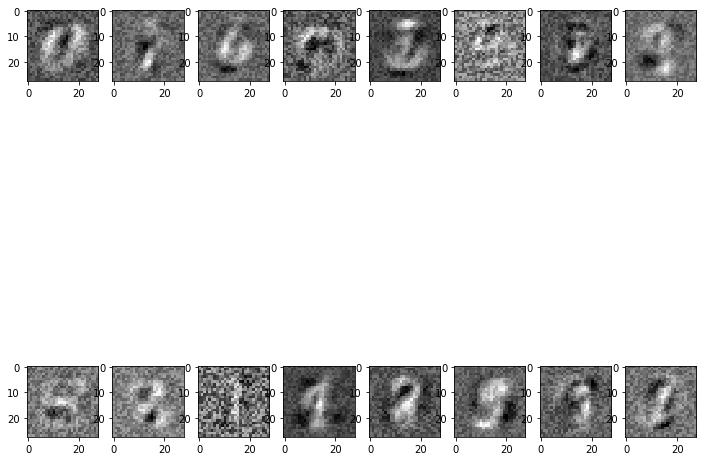

In [7]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables 
* This representation is similar to that of MLP
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

## Lets increase the number of hidden nodes

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [8]:
nb_hidden = 128

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))
print("Training Finished!")
# Evaluate
evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 784)               101136    
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2932 - val_loss: 0.2324
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2113 - val_loss: 0.1920
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.1820 - val_loss: 0.1708
Epoch 4/5
60000/60000 [===============

### Visualize the reconstruction

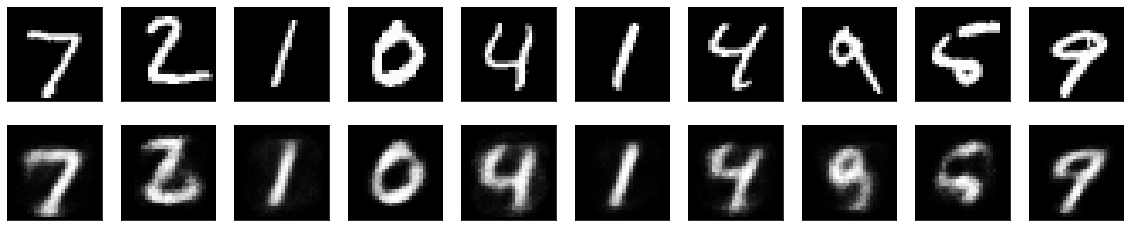

In [9]:
# Decode test images 
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Visualize the weights

Shape of Hidden Layer (784, 128)
Visualization of Hidden Layer


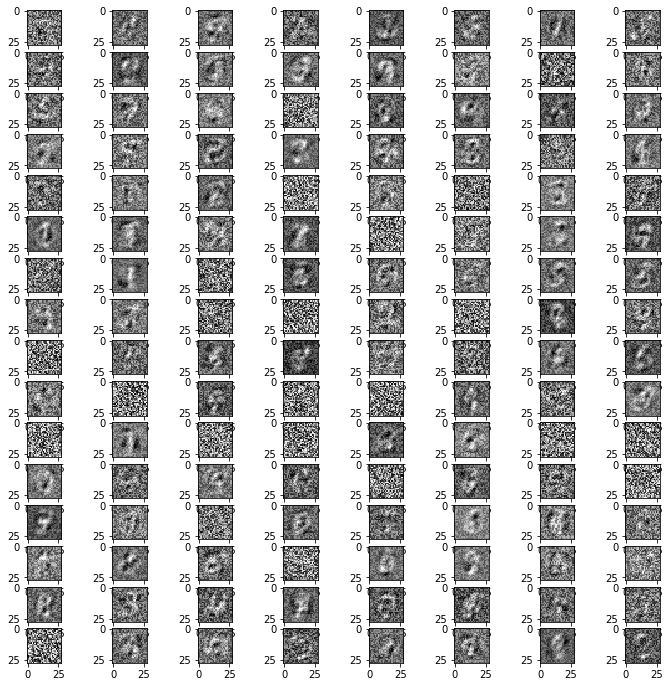

In [10]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

## Lets go for sparse!

In [11]:
nb_hidden = 1024

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test, x_test))
print("Training Finished!")
# Evaluate
evaluation = autoencoder.evaluate(x_test, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_6 (Dense)              (None, 784)               803600    
Total params: 1,607,440
Trainable params: 1,607,440
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.2601 - val_loss: 0.1982
Epoch 2/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.1795 - val_loss: 0.1625
Epoch 3/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.1538 - val_loss: 0.1437
Epoch 4/5
60000/60000 [===========

### Visualize the reconstruction

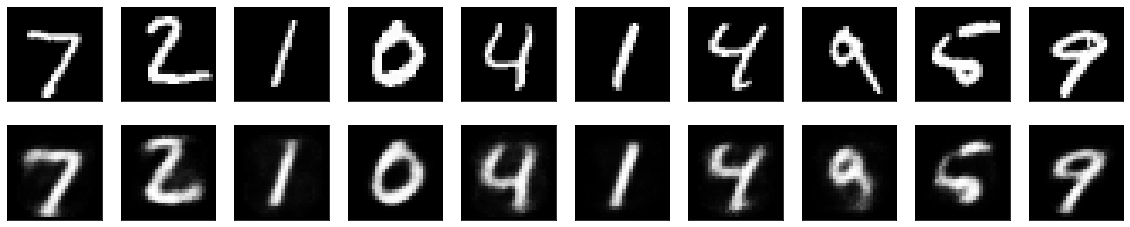

In [12]:
# Decode test images 
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Visualize the weights

Shape of Hidden Layer (784, 128)
Visualization of first 128 nodes in the Hidden Layer


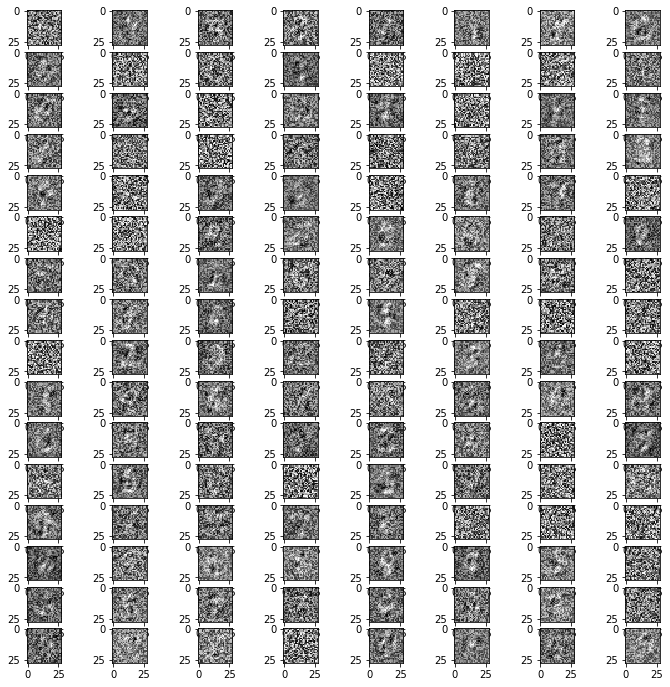

In [13]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)
    
nb_show = 128 
layer = np.array(w[1][0])
layer1 = layer[:,0:nb_show]
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of first",nb_show,"nodes in the Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_show/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

# Denoising Autoencoder

### Adding noise

In [14]:
# Add random noise
corruption_level = 0.3

x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


### Denoising Autoencoder

In [15]:
# Hyper parameters
batch_size = 128
nb_epoch = 5

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 32

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


### Training

In [16]:
# Train
autoencoder.fit(x_train_noisy, x_train,
                nb_epoch=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3024 - val_loss: 0.2597
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2436 - val_loss: 0.2249
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2141 - val_loss: 0.2019
Epoch 4/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.1950 - val_loss: 0.1861
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.1814 - val_loss: 0.1742


### Evaluation

In [17]:
# Evaluate
evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

10000/10000 [==============================] - 0s 18us/step

Summary: Loss over the test dataset: 0.17


### Visualize the reconstruction

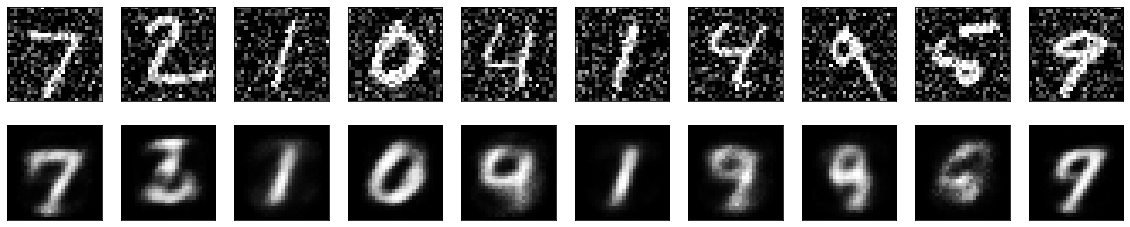

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# Decode test images 
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Visualize the weights

Shape of Hidden Layer (784, 32)
Visualization of Hidden Layer


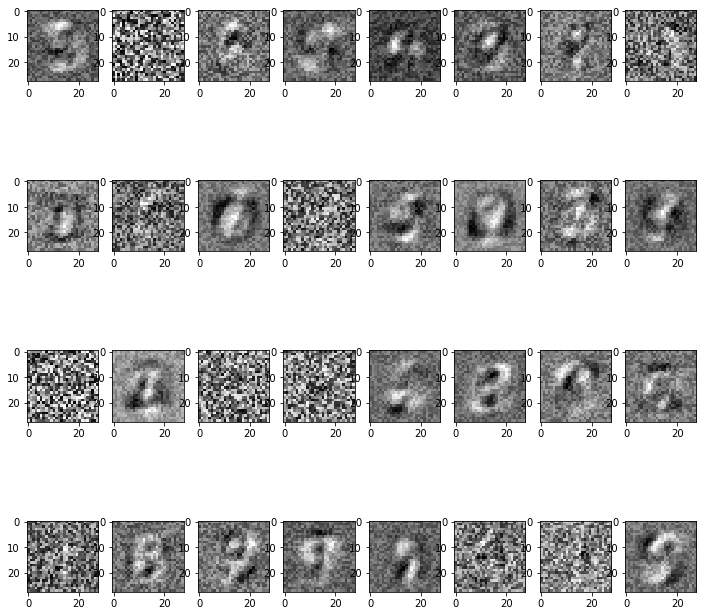

In [19]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Lets corrupt the data too much and see what happpens

In [21]:
# Add random noise
corruption_level = 0.7

x_train_noisy = x_train + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + corruption_level * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


### Model Training and Evaluation

In [22]:
# Hyper parameters
batch_size = 128
nb_epoch = 5

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28

# Parameters for denoising autoencoder
nb_visible = img_rows * img_cols
nb_hidden = 32

# Build autoencoder model
input_img = Input(shape=(nb_visible,))
encoded = Dense(nb_hidden, activation='relu')(input_img)
decoded = Dense(nb_visible, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(x_train_noisy, x_train,
                nb_epoch=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_data=(x_test_noisy, x_test))

# Evaluate
evaluation = autoencoder.evaluate(x_test_noisy, x_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.2939 - val_loss: 0.2644
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2604 - val_loss: 0.2532
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2441 - val_loss: 0.2335
Epoch 4/5
60000/60000 [=================

### Visualize the reconstruction

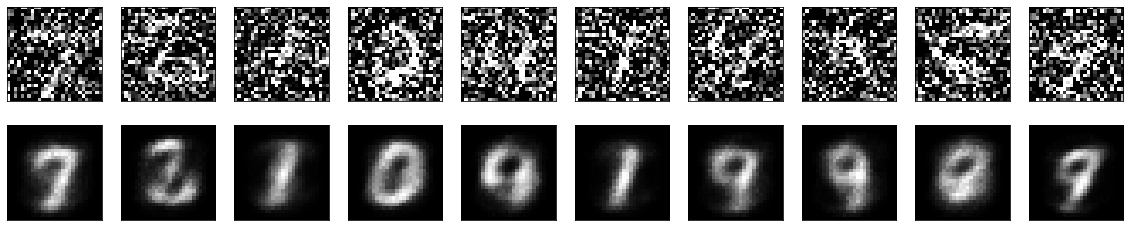

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# Decode test images 
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Visualize the weights

Shape of Hidden Layer (784, 32)
Visualization of Hidden Layer


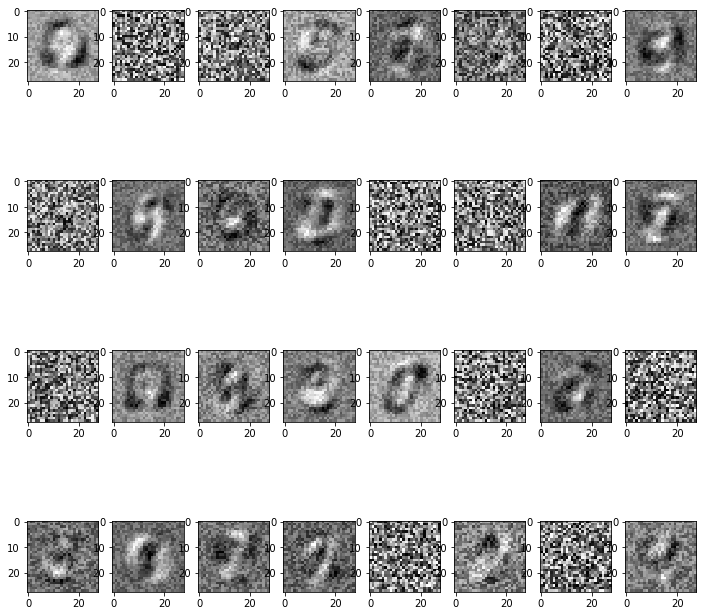

In [24]:
w = []
for layer in autoencoder.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[1][0])
print("Shape of Hidden Layer",layer1.shape)
print("Visualization of Hidden Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(nb_hidden/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()